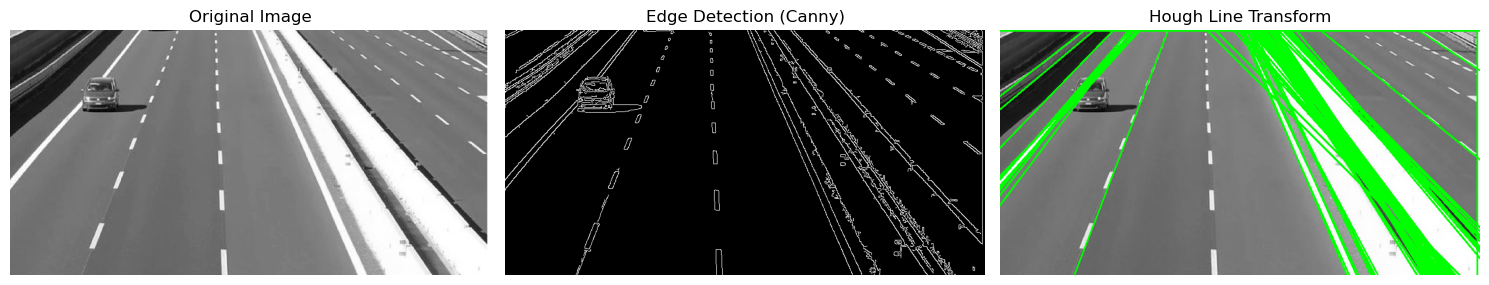

In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the image
image_path = os.path.join(os.getcwd(), 'data', 'images', 'hough_transform_road.png')  # Construct the full path to the image

# Load the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale mode

# Check if the image loaded properly
if image is None:
    print("Error: Could not load the image.")  # Print an error if the image is not loaded
else:
    # Apply edge detection (Canny)
    edges = cv2.Canny(image, 50, 150)  # Detect edges using Canny with thresholds (50, 150)

    # Apply Hough Line Transform
    # Parameters: edges, rho resolution = 1 pixel, theta resolution = 1 degree, threshold = 100
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

    # Convert grayscale image to BGR for drawing lines
    image_with_lines = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert grayscale to BGR for line visualization

    # If lines are detected, draw them on the image
    if lines is not None:
        for line in lines:
            rho, theta = line[0]  # Extract rho (distance) and theta (angle) for each detected line
            a = np.cos(theta)  # Calculate cosine of the angle
            b = np.sin(theta)  # Calculate sine of the angle
            x0 = a * rho  # x-coordinate of the point closest to the origin
            y0 = b * rho  # y-coordinate of the point closest to the origin
            x1 = int(x0 + 1000 * (-b))  # Calculate the endpoint in one direction
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))  # Calculate the endpoint in the opposite direction
            y2 = int(y0 - 1000 * (a))
            # Draw the line on the image (green color, 2-pixel thickness)
            cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Plot the results
    plt.figure(figsize=(15, 7))  # Create a figure with specified dimensions

    # Original Image
    plt.subplot(1, 3, 1)  # First subplot (1 row, 3 columns, position 1)
    plt.imshow(image, cmap='gray')  # Display the original grayscale image
    plt.title("Original Image")  # Add a title to the subplot
    plt.axis("off")  # Turn off the axes for better visualization

    # Edge Detection Result
    plt.subplot(1, 3, 2)  # Second subplot (1 row, 3 columns, position 2)
    plt.imshow(edges, cmap='gray')  # Display the edges detected by Canny
    plt.title("Edge Detection (Canny)")  # Add a title to the subplot
    plt.axis("off")  # Turn off the axes

    # Hough Line Transform Result
    plt.subplot(1, 3, 3)  # Third subplot (1 row, 3 columns, position 3)
    plt.imshow(image_with_lines)  # Display the image with Hough lines overlaid
    plt.title("Hough Line Transform")  # Add a title to the subplot
    plt.axis("off")  # Turn off the axes

    plt.tight_layout()  # Adjust subplot layout for better spacing
    plt.show()  # Display the plots
